In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

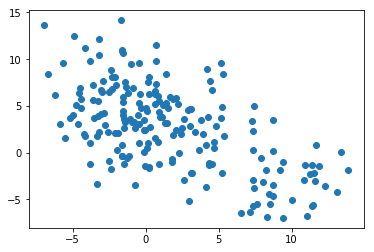

In [66]:
"""First, let us get familiar with sklearn Kmeans. 
Then, we will implement our own KMean algorithm.
"""
ds = make_blobs(n_samples=200, centers=5,cluster_std=2.8, random_state=0)
plt.scatter(ds[0][:, 0], ds[0][:, 1])

In [47]:
km = KMeans(n_clusters=4)
km.fit(ds[0])
km

KMeans(n_clusters=4)

In [48]:
# show the cluster center returned 
centers = km.cluster_centers_
centers

array([[-1.68991902,  7.84739943],
       [ 8.97508868, -2.75068313],
       [ 2.16126467,  2.81825914],
       [-1.30168339,  2.51206912]])

In [49]:
# Which cluster each sample belongs to
y_pred = km.predict(ds[0])
y_pred

array([2, 0, 2, 0, 2, 2, 3, 3, 2, 2, 2, 2, 1, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       2, 0, 1, 2, 0, 2, 1, 0, 2, 3, 3, 3, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2,
       1, 1, 1, 2, 2, 0, 3, 2, 0, 1, 1, 1, 3, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 2, 2, 1, 1, 3, 1, 0, 0, 1, 2, 3, 3, 2, 0, 3, 2, 2, 0, 0, 3, 2,
       1, 1, 0, 1, 0, 0, 3, 2, 3, 3, 1, 2, 3, 3, 1, 2, 2, 1, 1, 0, 0, 3,
       2, 2, 1, 0, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 2, 3, 2, 0, 2, 3, 3, 2,
       0, 2, 0, 1, 2, 3, 1, 1, 2, 1, 3, 3, 0, 2, 2, 0, 3, 0, 3, 0, 1, 1,
       1, 0, 0, 3, 2, 1, 0, 0, 3, 0, 2, 3, 0, 0, 1, 2, 3, 3, 2, 2, 2, 0,
       1, 0, 0, 2, 2, 3, 2, 3, 3, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2, 2, 1, 1,
       3, 0], dtype=int32)

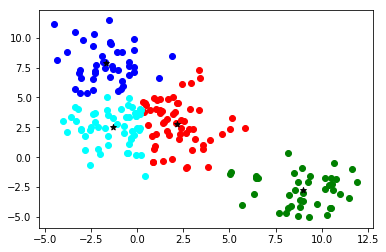

In [50]:
# Show the cluster result. 
pairs = zip(range(0, 4), ('blue', 'green', 'red', 'cyan'))
for cluster_id, color in pairs:
    plt.scatter(ds[0][y_pred == cluster_id, 0], ds[0][y_pred == cluster_id, 1], color=color)
    plt.scatter(centers[cluster_id][0], centers[cluster_id][1], marker='*', color = 'black')

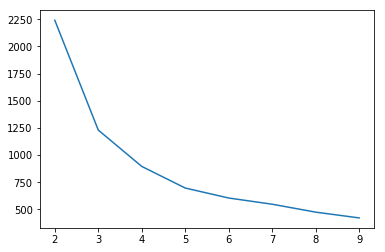

In [61]:
# Search for the best K
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
sse = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(ds[0])
    score = silhouette_score(ds[0], model.labels_)
    silhouette_coefficients.append(score)
    sse.append(model.inertia_)

# plt.plot(range(2, 10), silhouette_coefficients)    
plt.plot(range(2, 10), sse)